ACHTUNG FUNKTIONIERT der ZEIT nicht!!!

In [1]:
#-----------------------------------------------------------------------
# Modules for import
#-----------------------------------------------------------------------
import matplotlib.pyplot as plt  
import pandas as pd 
import hb_functions as hb
from sqlalchemy import create_engine
import sys
import seaborn as sns
sns.set_style("whitegrid")
#sns.set_style("whitegrid", {'axes.grid' : False})

%matplotlib inline

In [2]:

'''
#-----------------------------------------------------------------------
#Define database
#-----------------------------------------------------------------------
'''
haushaltsbuch_db = create_engine('sqlite:////Users/Potzenhotz/data/database/haushaltsbuch.db')

In [4]:
'''
-----------------------------------------------------------------------
 CORE: Read table
-----------------------------------------------------------------------
'''
var_jahr = '2017'
var_monat = '4'
print('Start reading tables')
mart_sql_query = 'select * from dm_konsum\
                    where Jahr = "'+var_jahr+'" \
                    and Monat = "'+var_monat+'";' 
loaded_dm_konsum = hb.read_sql(haushaltsbuch_db, mart_sql_query)
loaded_dm_konsum.set_index('index', inplace=True)
print(loaded_dm_konsum)
loaded_dm_konsum['Wichtige Ausgaben'] = loaded_dm_konsum['Konsum'] + loaded_dm_konsum['Essen']\
                                            + loaded_dm_konsum['Haushalt'] + loaded_dm_konsum['Bargeld']\
                                            + loaded_dm_konsum['Auto'] + loaded_dm_konsum['Sport']\
                                            + loaded_dm_konsum['Sonstiges']
print(loaded_dm_konsum) 
loaded_dm_konsum = loaded_dm_konsum.drop('Jahr', 1)
loaded_dm_konsum = loaded_dm_konsum.drop('Monat', 1)

Start reading tables
          Jahr  Monat  Amazon  Buecher  Drogerie  Elektronik  Kleidung  Lotto  \
index                                                                           
Ausgaben  2017      4  142.87      3.5      6.55         0.0       0.0    0.0   

          Paypal  Rest  Schreibwaren  Spirituosen  
index                                              
Ausgaben   52.97   0.0           0.0          0.0  


KeyError: 'Konsum'

In [4]:
print(loaded_dm_konsum)
transpose_konsum_df = loaded_dm_konsum.T

transpose_konsum_df['Extra Ausgaben'] = 0
transpose_konsum_df['Kritische Ausgaben'] = 0

#print(transpose_konsum_df.ix['Wichtige Ausgaben','Ausgaben']-2400)
original_w_ausgbaben = transpose_konsum_df.ix['Wichtige Ausgaben','Ausgaben']
kritische_ausgaben = original_w_ausgbaben-2400 
extra_ausgaben = original_w_ausgbaben - kritische_ausgaben - 1200 
#value_when_true if condition else value_when_false
kritische_ausgaben = 0 if kritische_ausgaben < 0 else kritische_ausgaben
extra_ausgaben = 0 if extra_ausgaben < 0 else extra_ausgaben
transpose_konsum_df.ix['Wichtige Ausgaben','Ausgaben'] = original_w_ausgbaben - kritische_ausgaben - extra_ausgaben
transpose_konsum_df.ix['Wichtige Ausgaben','Extra Ausgaben'] = extra_ausgaben
transpose_konsum_df.ix['Wichtige Ausgaben','Kritische Ausgaben'] = kritische_ausgaben


#print(transpose_konsum_df.columns)
#print(transpose_konsum_df)

          Konsum  Essen  Haushalt  Bargeld    Auto  Kreditkarte  Firma  Sport  \
index                                                                           
Ausgaben  205.89   57.7    585.52   1000.0  513.76          0.0  379.4    0.0   

          Urlaub  Sonstiges  Sparen  Wichtige Ausgaben  
index                                                   
Ausgaben     0.0        0.0  1400.0            2362.87  


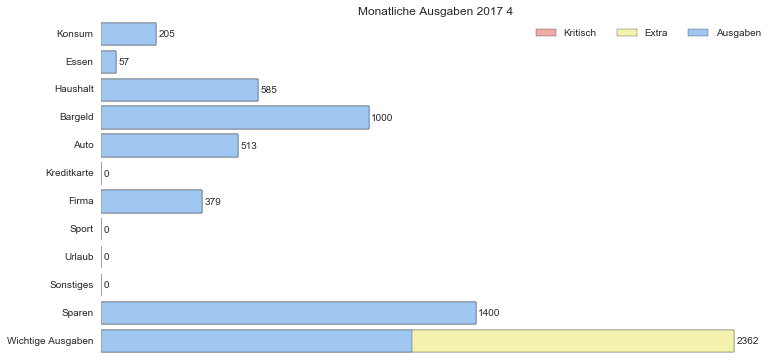

In [5]:
f, ax = plt.subplots(figsize=(12, 6))


def abstand(zahl):
    if zahl < 10:
        return 1
    elif zahl < 100:
        return 5
    elif zahl < 1000:
        return 10
    elif zahl < 10000:
        return 40
    else:
        return 30

# Pre

ausgaben = transpose_konsum_df['Ausgaben']
extra_ausgaben = transpose_konsum_df['Extra Ausgaben']
kritische_ausgaben = transpose_konsum_df['Kritische Ausgaben']
#print(ausgaben, extra_ausgaben, kritische_ausgaben)

# Plot the total crashes
sns.set_color_codes("pastel")

sns_plot = sns.barplot(x=ausgaben + extra_ausgaben + kritische_ausgaben
            , y=transpose_konsum_df.index, label="Kritisch", color="r")
for p in ax.patches:
    width = p.get_width()
    #print(width)
    #print(p.get_y())
    ax.text(width + 10,
            p.get_y()+p.get_height()/1.9,
            int(width),
            va = 'center' ) 

sns_plot = sns.barplot(x=ausgaben + extra_ausgaben
            , y=transpose_konsum_df.index, label="Extra", color="y")

sns_plot = sns.barplot(x=ausgaben, y=transpose_konsum_df.index,
            label="Ausgaben", color="b")

#print(ax.patches)

# Turn off tick labels
ax.set_xticklabels([])
# Turns off grid on the left Axis.
ax.grid(False)

#annotate
#print(transpose_konsum_df.index[2])
#ax.bar(100, transpose_konsum_df['Ausgaben'].[], 0.35, color="r")

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper right", frameon=False)
ax.set(ylabel="", xlabel="")
sns.despine(left=True, bottom=True)
ax.set_title('Monatliche Ausgaben '+var_jahr+' '+ var_monat)
fig1 = plt.gcf()

In [6]:
#plt.savefig("/Users/Potzenhotz/data/final_data/hb_plot.png", bbox_inches="tight")  
plot_name = 'month_expenses_' + var_jahr + '_' + var_monat
plot_full_name = "/Users/Potzenhotz/data/final_data/" + plot_name + ".png"
fig1.savefig(plot_full_name)  